In [14]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import os

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [15]:
#Set data sets path here
data_path = ['data']

# Import the data using the file path
dataset = ['Animated-TV-Shows-Final.csv']
data = os.sep.join(data_path + dataset)

# Import data
df = pd.read_csv(data)

df.head()

Unique ID                    TV Show Title  IMDB Rating Start Year  \
0   tt2861424                   Rick and Morty          9.2       2013   
1  tt13616990                     Chainsaw Man          9.1       2022   
2  tt12590266           Cyberpunk: Edgerunners          8.4       2022   
3  tt14986406  Bleach: Thousand-Year Blood War          9.6       2022   
4   tt0096697                     The Simpsons          8.7       1989   

  End Year TV Rating Episode Run Time (min)                 Top Genres  \
0              TV-14                     23  [' Adventure', ' Comedy']   
1              TV-MA                    NaN  [' Action', ' Adventure']   
2              TV-MA                     24  [' Action', ' Adventure']   
3              TV-MA                     24  [' Action', ' Adventure']   
4              TV-14                     22                [' Comedy']   

   Total Occ  
0        2.0  
1        0.0  
2        0.0  
3        0.0  
4        5.0

In [16]:
#filling in any null values
df['Total Occ'] = df['Total Occ'].fillna(0)
df['Episode Run Time (min)'] = df['Episode Run Time (min)'].fillna(0)
df['Start Year'] = df['Start Year'].fillna("0")
df['End Year'] = df['End Year'].fillna("0")

df.head()

Unique ID                    TV Show Title  IMDB Rating Start Year  \
0   tt2861424                   Rick and Morty          9.2       2013   
1  tt13616990                     Chainsaw Man          9.1       2022   
2  tt12590266           Cyberpunk: Edgerunners          8.4       2022   
3  tt14986406  Bleach: Thousand-Year Blood War          9.6       2022   
4   tt0096697                     The Simpsons          8.7       1989   

  End Year TV Rating Episode Run Time (min)                 Top Genres  \
0              TV-14                     23  [' Adventure', ' Comedy']   
1              TV-MA                      0  [' Action', ' Adventure']   
2              TV-MA                     24  [' Action', ' Adventure']   
3              TV-MA                     24  [' Action', ' Adventure']   
4              TV-14                     22                [' Comedy']   

   Total Occ  
0        2.0  
1        0.0  
2        0.0  
3        0.0  
4        5.0

In [17]:
#removing extra artifacts left over from webscraping
df['Top Genres'] = df['Top Genres'].str.replace(r"\[","", regex=True)
df['Top Genres'] = df['Top Genres'].str.replace(r"\]","", regex=True)
df['Start Year'] = df['Start Year'].str.replace(r"[^0-9]","", regex=True)
df['Episode Run Time (min)'] = df['Episode Run Time (min)'].str.replace(r"[^0-9]","", regex=True)

df.head()

Unique ID                    TV Show Title  IMDB Rating Start Year  \
0   tt2861424                   Rick and Morty          9.2       2013   
1  tt13616990                     Chainsaw Man          9.1       2022   
2  tt12590266           Cyberpunk: Edgerunners          8.4       2022   
3  tt14986406  Bleach: Thousand-Year Blood War          9.6       2022   
4   tt0096697                     The Simpsons          8.7       1989   

  End Year TV Rating Episode Run Time (min)               Top Genres  \
0              TV-14                     23  ' Adventure', ' Comedy'   
1              TV-MA                    NaN  ' Action', ' Adventure'   
2              TV-MA                     24  ' Action', ' Adventure'   
3              TV-MA                     24  ' Action', ' Adventure'   
4              TV-14                     22                ' Comedy'   

   Total Occ  
0        2.0  
1        0.0  
2        0.0  
3        0.0  
4        5.0

In [18]:
#splitting the genres into two seperate columns, so the genres are calculated seperately and not together
df[['Top Genre', 'Secondary Genre']] = df['Top Genres'].str.split(',', expand=True)
#getting rid of the dual genre column
del df['Top Genres']

df.head()

Unique ID                    TV Show Title  IMDB Rating Start Year  \
0   tt2861424                   Rick and Morty          9.2       2013   
1  tt13616990                     Chainsaw Man          9.1       2022   
2  tt12590266           Cyberpunk: Edgerunners          8.4       2022   
3  tt14986406  Bleach: Thousand-Year Blood War          9.6       2022   
4   tt0096697                     The Simpsons          8.7       1989   

  End Year TV Rating Episode Run Time (min)  Total Occ     Top Genre  \
0              TV-14                     23        2.0  ' Adventure'   
1              TV-MA                    NaN        0.0     ' Action'   
2              TV-MA                     24        0.0     ' Action'   
3              TV-MA                     24        0.0     ' Action'   
4              TV-14                     22        5.0     ' Comedy'   

  Secondary Genre  
0       ' Comedy'  
1    ' Adventure'  
2    ' Adventure'  
3    ' Adventure'  
4            None

In [20]:
def successRange(rawRatings):
    categorizedRatings = []
    for rating in rawRatings:
        if(0.0 <= rating and rating <= 2.4):
            categorizedRatings.append("terrible")
        elif(2.4 <= rating and rating <= 5.0):
            categorizedRatings.append("poor")
        elif(5.1 <= rating and rating <= 7.4):
            categorizedRatings.append("average")
        else:
            categorizedRatings.append("excellent")
    return categorizedRatings

df['IMDB Rating'] = successRange(df['IMDB Rating'])

dtype('O')

In [21]:
#label encoding all useable features
df[['IMDB Rating', 'TV Rating', 'Top Genre', 'Secondary Genre', 'Start Year', 'End Year', 'Episode Run Time (min)']] = df[['IMDB Rating', 'TV Rating', 'Top Genre', 'Secondary Genre', 'Start Year', 'End Year', 'Episode Run Time (min)']].apply(LabelEncoder().fit_transform)

df.head()

Unique ID                    TV Show Title  IMDB Rating  Start Year  \
0   tt2861424                   Rick and Morty            1          25   
1  tt13616990                     Chainsaw Man            1          34   
2  tt12590266           Cyberpunk: Edgerunners            1          34   
3  tt14986406  Bleach: Thousand-Year Blood War            1          34   
4   tt0096697                     The Simpsons            1           1   

   End Year  TV Rating  Episode Run Time (min)  Total Occ  Top Genre  \
0         0         12                      44        2.0          3   
1         0         14                     130        0.0          1   
2         0         14                      46        0.0          1   
3         0         14                      46        0.0          1   
4         0         12                      42        5.0          6   

   Secondary Genre  
0                4  
1                1  
2                1  
3                1  
4               25

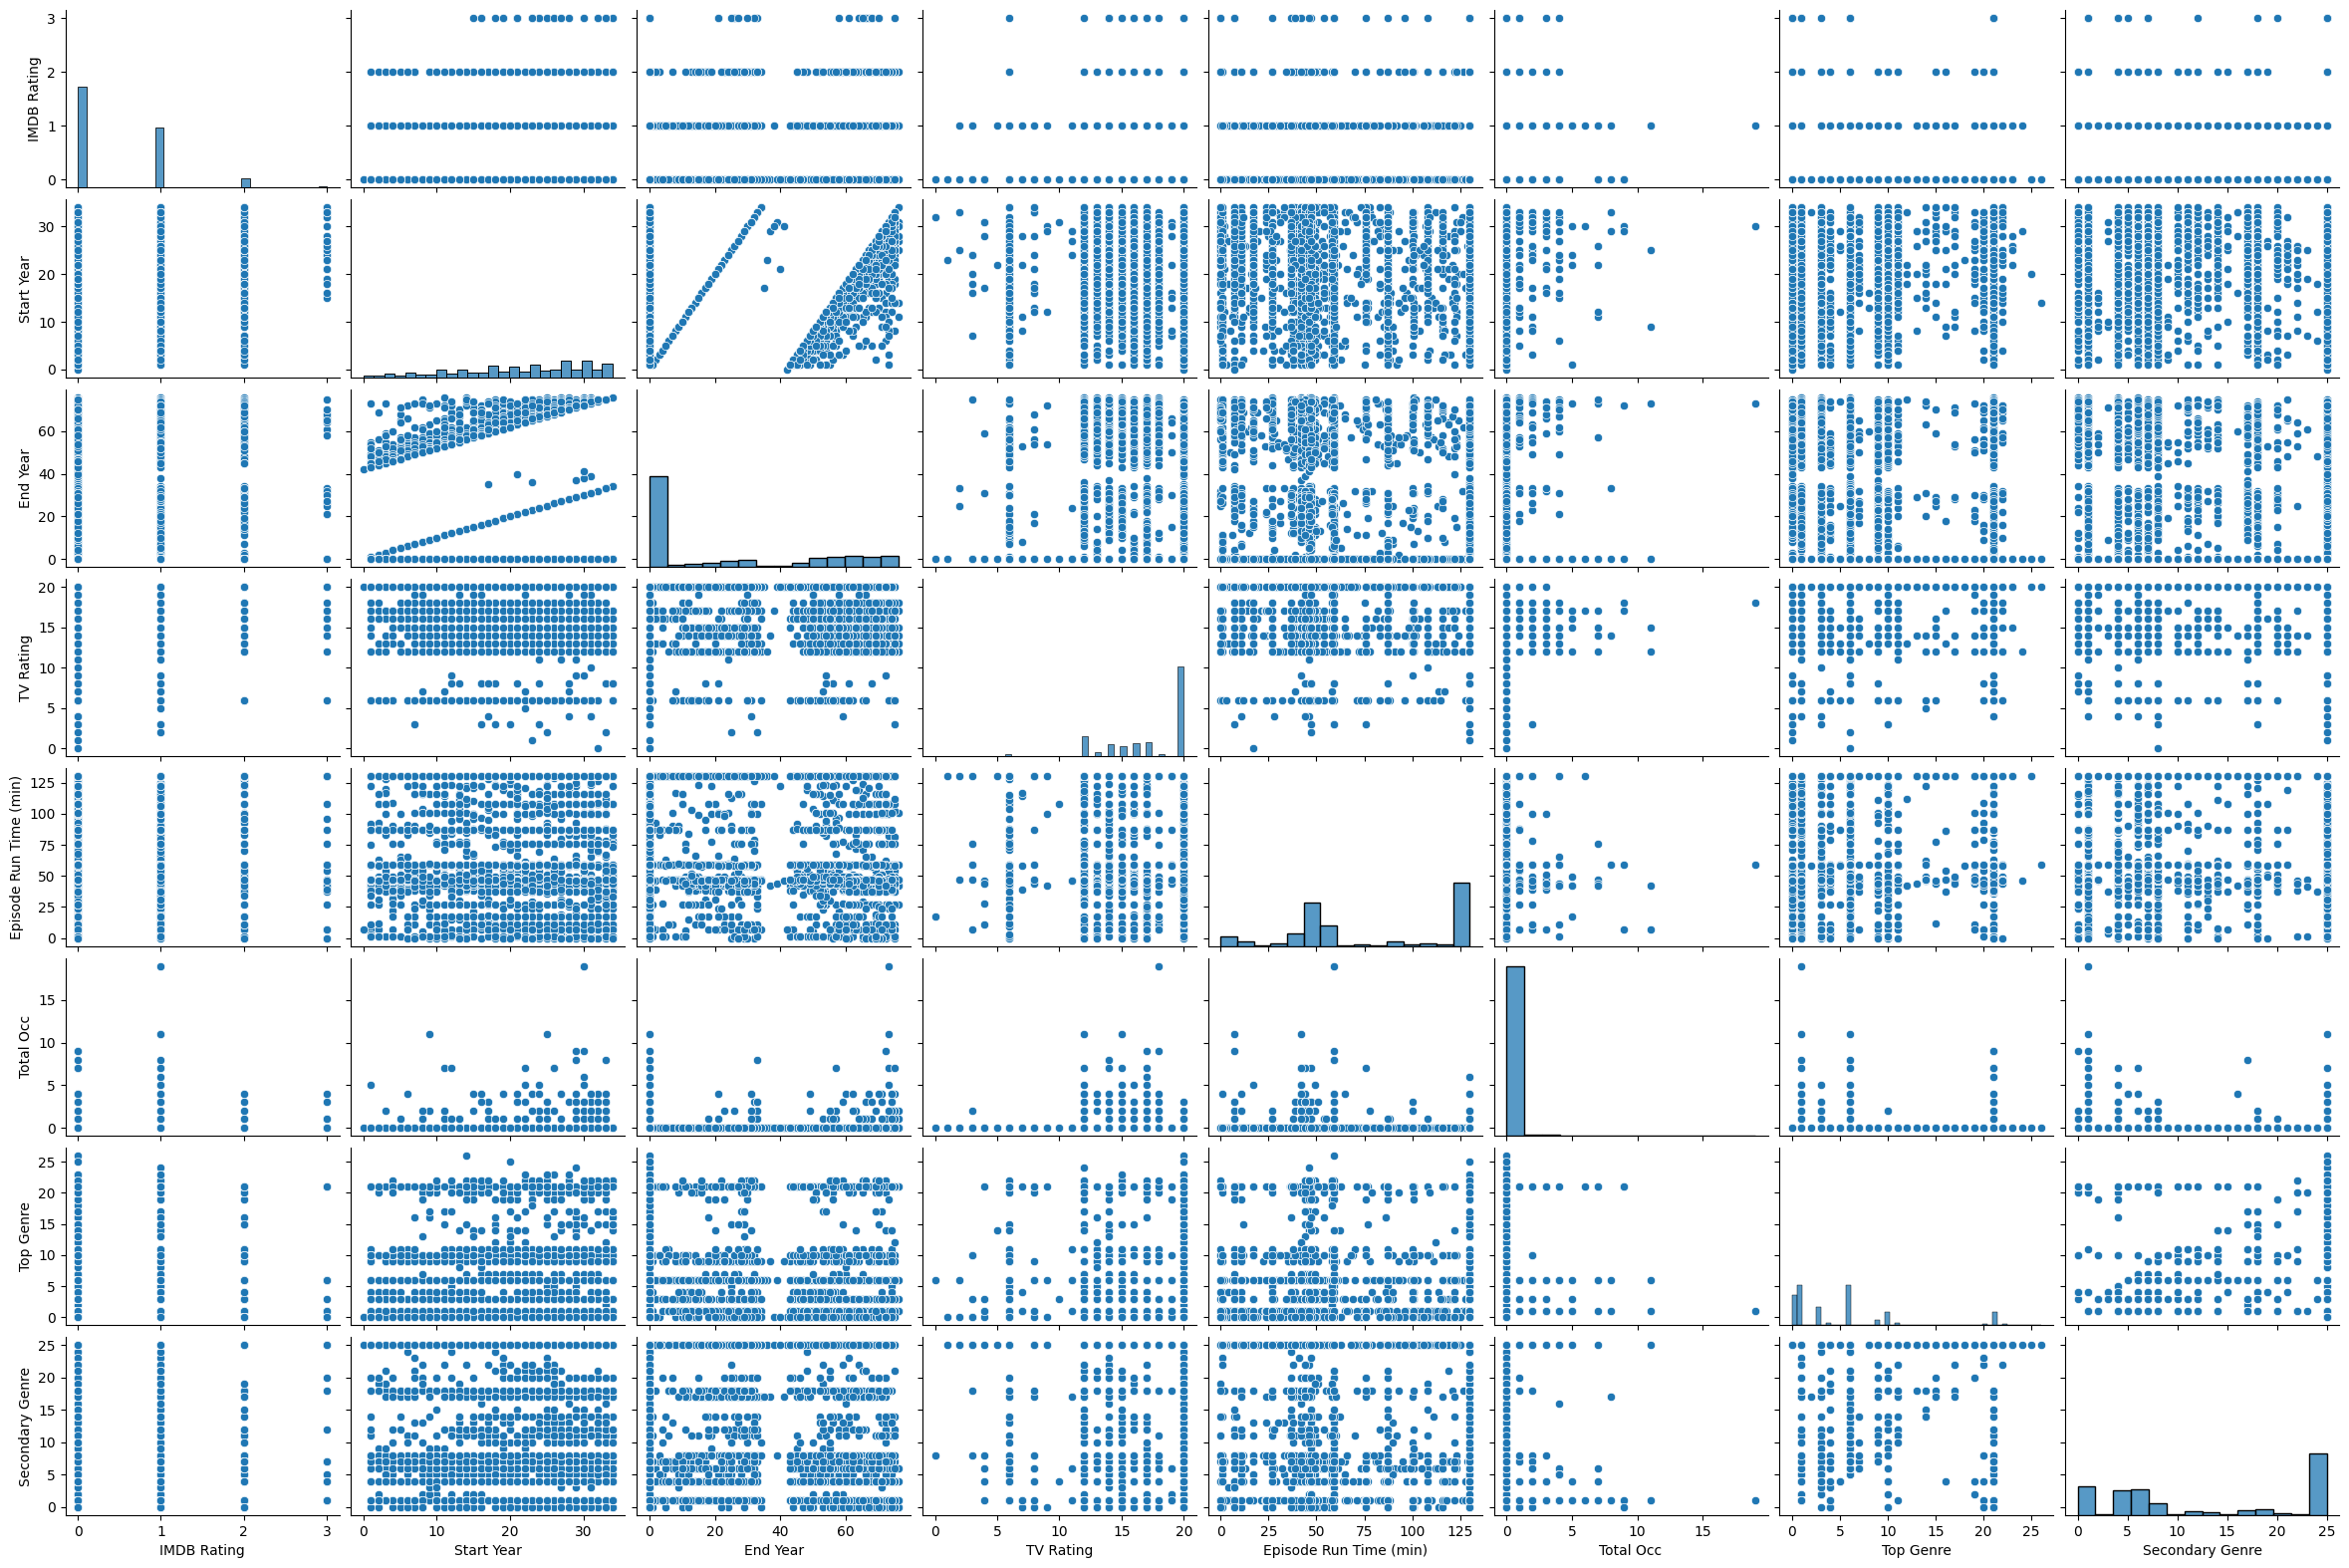

In [22]:
sns.pairplot(df, height=2, aspect=1.5)
plt.savefig('pariplot3.png');

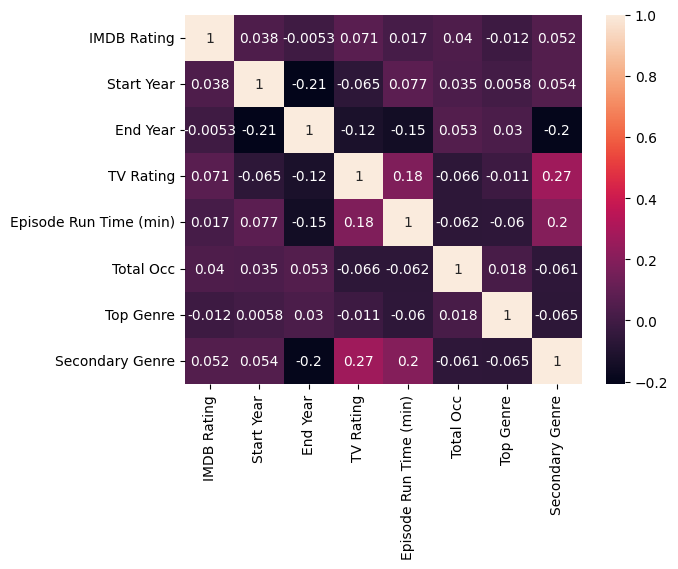

In [23]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.savefig('corrHeat3.png', bbox_inches = 'tight');

In [24]:
#feature and target division
X = df[['TV Rating', 'Total Occ', 'Top Genre', 'Secondary Genre', 'Start Year', 'End Year', 'Episode Run Time (min)']]
y = df['IMDB Rating']

In [25]:
#splitting data between test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [26]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
Y_pred = lr.predict(X_test)
acc_log = round(lr.score(X_train, y_train) * 100, 2)
acc_log

C:\Users\student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


60.28

In [27]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

73.46

In [28]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

60.08

In [29]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

C:\Users\student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


59.55

In [30]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

59.97

In [31]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

43.16

In [32]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

35.31

In [35]:
# Decision Tree

decision_tree = DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

#fig, ax = plt.subplots(figsize=(20, 20))
#ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test, ax=ax)
#plt.show()
print(classification_report(y_test, Y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.60      0.63      0.61      1350
           1       0.42      0.39      0.40       872
           2       0.08      0.08      0.08       121
           3       0.00      0.00      0.00        16

    accuracy                           0.51      2359
   macro avg       0.27      0.27      0.27      2359
weighted avg       0.50      0.51      0.50      2359



In [36]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

#fig, ax = plt.subplots(figsize=(20, 20))
#ConfusionMatrixDisplay.from_estimator(random_forest, X_test, y_test, ax=ax)
#plt.show()

print(classification_report(y_test, Y_pred))


              precision    recall  f1-score   support

           0       0.61      0.79      0.69      1350
           1       0.50      0.34      0.41       872
           2       0.10      0.02      0.04       121
           3       0.00      0.00      0.00        16

    accuracy                           0.58      2359
   macro avg       0.30      0.29      0.28      2359
weighted avg       0.54      0.58      0.55      2359



In [37]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

Model  Score
3               Random Forest  93.53
8               Decision Tree  93.53
1                         KNN  73.46
2         Logistic Regression  60.28
0     Support Vector Machines  60.08
4                 Naive Bayes  59.97
7                  Linear SVC  59.55
6  Stochastic Gradient Decent  43.16
5                  Perceptron  35.31

([<matplotlib.axis.YTick at 0x248bd315630>,
 [Text(0, 0, 'TV Rating'),
  Text(0, 1, 'Total Occ'),
  Text(0, 2, 'Top Genre'),
  Text(0, 3, 'Secondary Genre'),
  Text(0, 4, 'Start Year'),
  Text(0, 5, 'End Year'),
  Text(0, 6, 'Episode Run Time (min)')])

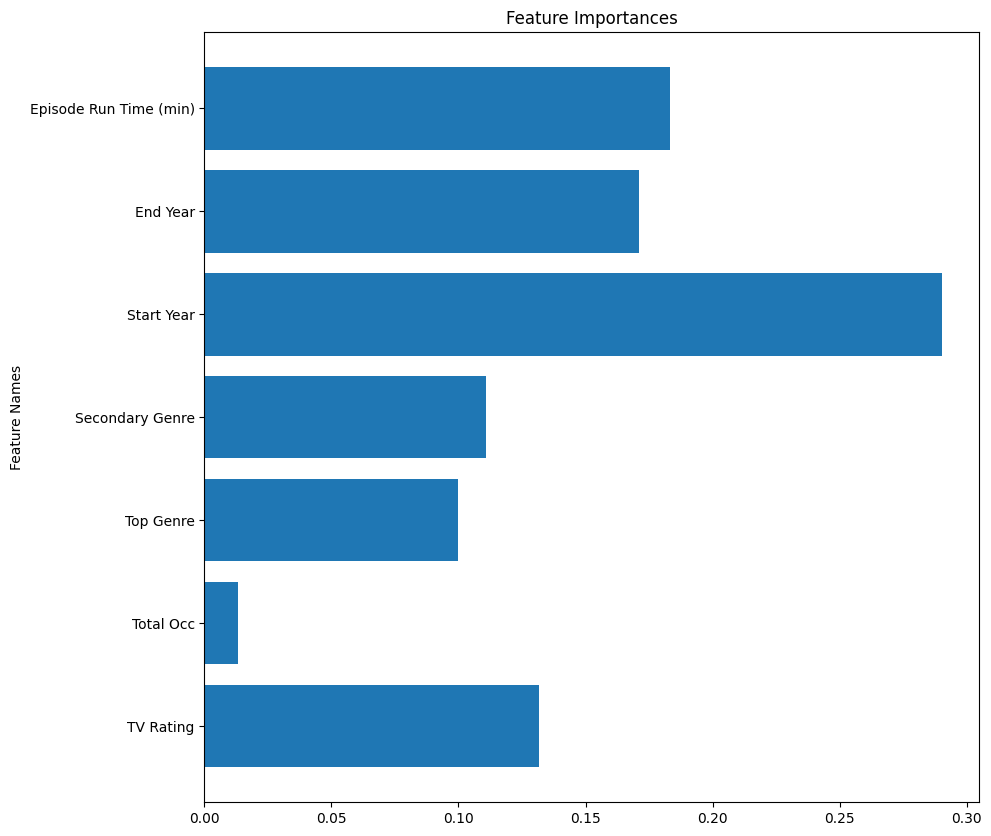

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
plt.barh(range(7), decision_tree.feature_importances_)
plt.title("Feature Importances")
plt.ylabel('Feature Names')
plt.yticks(range(7), df[['TV Rating', 'Total Occ', 'Top Genre', 'Secondary Genre', 'Start Year', 'End Year', 'Episode Run Time (min)']])

([<matplotlib.axis.YTick at 0x248bd38c970>,
 [Text(0, 0, 'TV Rating'),
  Text(0, 1, 'Total Occ'),
  Text(0, 2, 'Top Genre'),
  Text(0, 3, 'Secondary Genre'),
  Text(0, 4, 'Start Year'),
  Text(0, 5, 'End Year'),
  Text(0, 6, 'Episode Run Time (min)')])

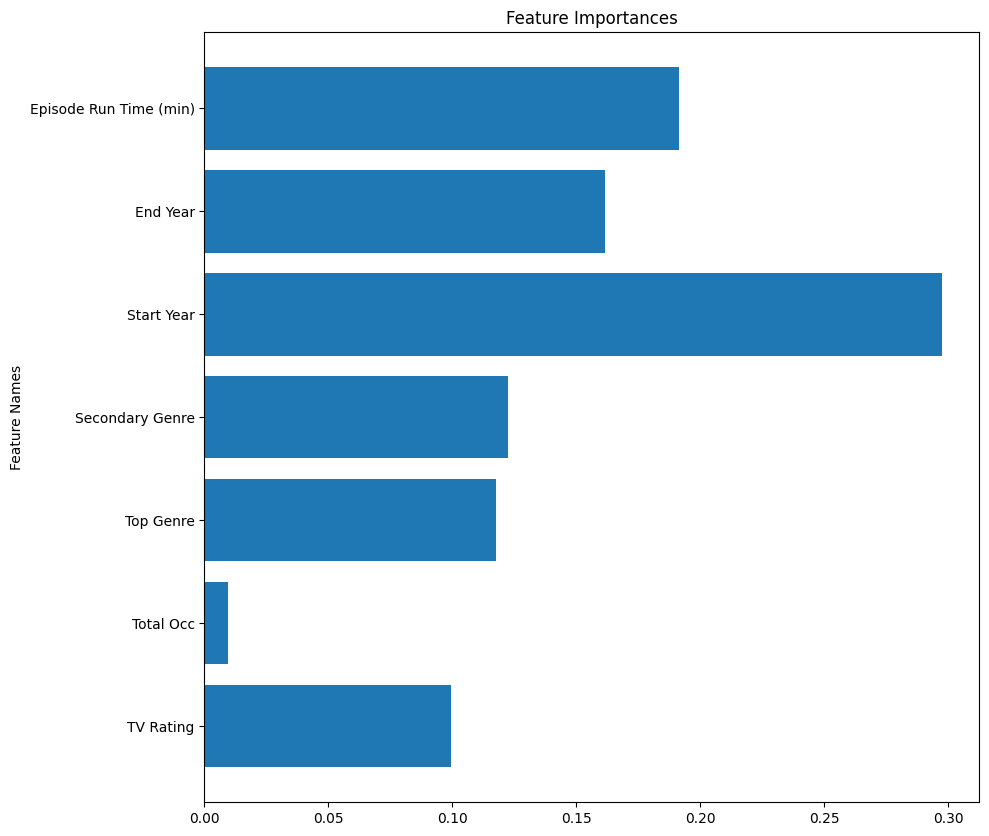

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
plt.barh(range(7), random_forest.feature_importances_)
plt.title("Feature Importances")
plt.ylabel('Feature Names')
plt.yticks(range(7), df[['TV Rating', 'Total Occ', 'Top Genre', 'Secondary Genre', 'Start Year', 'End Year', 'Episode Run Time (min)']])

In [41]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(105, 100))
plot_tree(random_forest.estimators_[0], feature_names=X.columns, filled=True)
fig.savefig('random_forest3.png')

In [ ]:
fig = plt.figure(figsize=(105, 100))
plot_tree(decision_tree, feature_names=X.columns, filled=True)
fig.savefig('decision_tree3.png')